# Problem Statement

Car Data-
Here, we will apply k-means clustering for grouping the similar cars in one cluster

In [172]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Cars Data file into Python DataFrame and view top 10 rows.

Get the data from here - https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/

In [173]:

## Define the column names as there are no headers available
colname = ['mpg','cylinders','displacement','horsepower','weight','acceleration','modelyear','origin','carname']
df = pd.read_csv('auto-mpg.data',delim_whitespace=True,names=colname)

## View top 10 rows 
df.head(10)


,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [174]:
### Print the dataypes
### Variable Horsepower is of type Object and requires to be converted to either Int or Float

df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
modelyear         int64
origin            int64
carname          object
dtype: object

In [175]:
## Verify the number of columns and  rows
## Rows = 398 and Cols = 9

df.shape

(398, 9)

In [176]:
## View the data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
modelyear,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


# Q3 Check for missing value check, incorrect data and perform imputation with mean, median, mode as necessary.

In [177]:
### *****************************************************************************###
###   Performed Values check
###   All the "?" present in the columns needs to be converted to Nan and then applied Mean ()
###
### ****************************************************************************###

hp_indicator = df[df.horsepower=='?'].index
df.loc[hp_indicator]

df.loc[hp_indicator, 'horsepower'] = float('nan')
df.horsepower = df.horsepower.apply(pd.to_numeric)
df.loc[hp_indicator, 'horsepower'] = int( df.horsepower.mean() )



In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
modelyear       398 non-null int64
origin          398 non-null int64
carname         398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [179]:
## Check for Missing Values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
modelyear       0
origin          0
carname         0
dtype: int64

In [180]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.462312,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199230,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences

In [181]:
## ****************************EDA ************************ 

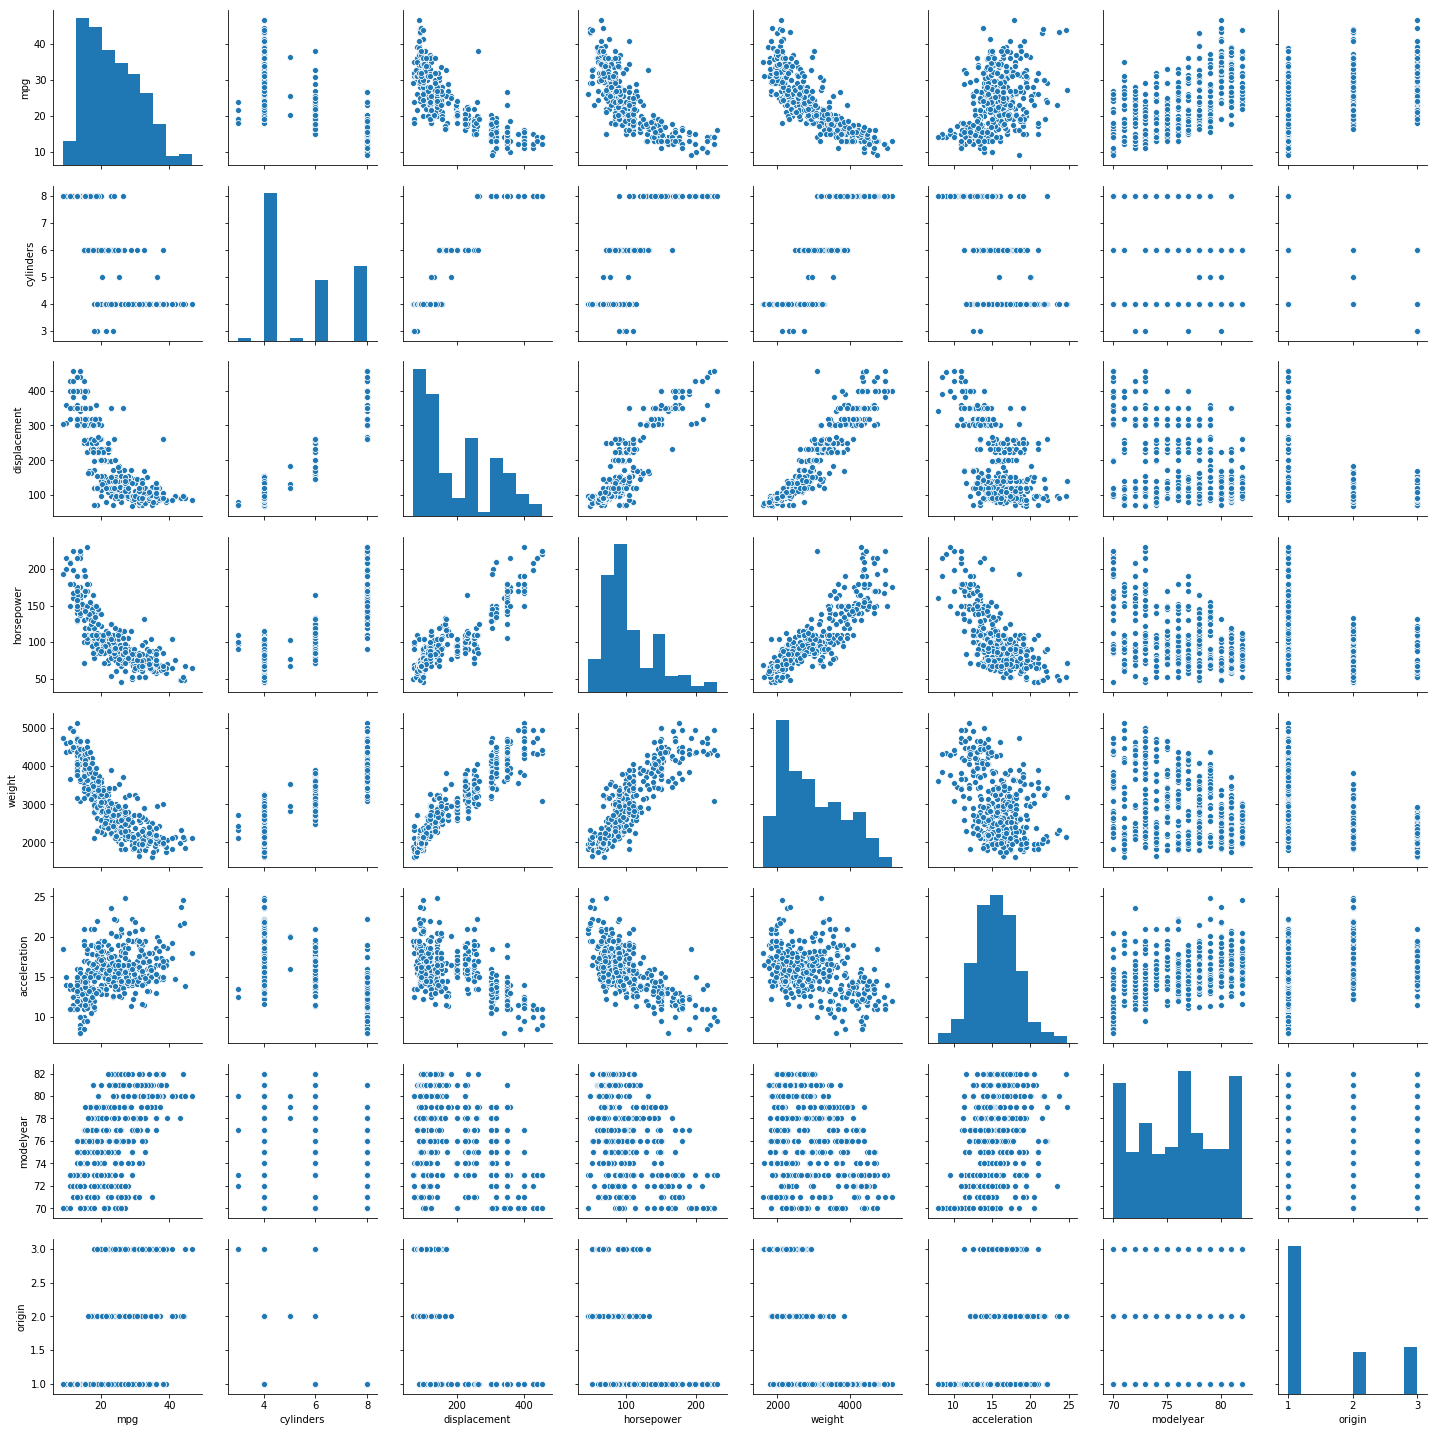

In [182]:
import seaborn as sns
from scipy import stats

sns.pairplot(df)

In [183]:
## ****************************Observations******************************

## Appears positive correlation with features related to 
## Mpg versus Displacement verus horsepower versus weight verus acceleration



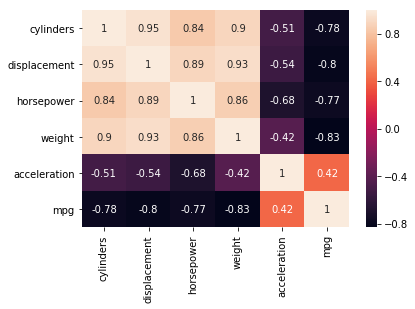

In [184]:
# Correlation Matrix To verify only the Required Variables

required_cols = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration','mpg']


sns.heatmap(
    data=df[required_cols].corr(),
    annot=True
    )

# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns

In [185]:
# Further dig into data shows max mpd is for 4 cylinders vehicles
# Origin as pointed earlier indicates production point so should be broken into dummy variables
# Year would be more effective if we can transorm this to calculate age of vehicle. This dataset was used in 1983 so we would 
         #subtract year from 83 to get the age



# Q6. Create new data frame with standardize variables and imputation for any missing/outliers

In [189]:

### ********************************************************************************
### Missing value check was done above and hp column was treated with median values
### Applly Scalar Methods
### ********************************************************************************

from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler()

#required_cols_origin = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration','mpg']



# Q7. Create appropriate clusters with the new data set

In [190]:
clust1 = scaler.fit_transform(df[required_cols])
clust1 = pd.DataFrame(clust1,columns=required_cols)

# Q8. Identify the appropriate clusters with result from above question

In [191]:
import scipy.cluster.hierarchy as shc
%matplotlib inline​import scipy.cluster.hierarchy as shc
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

UsageError: unrecognized arguments: scipy.cluster.hierarchy as shc


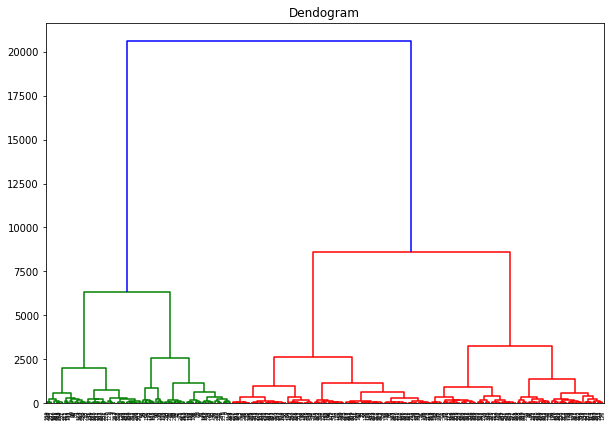

In [192]:
###*****************************************************************
### Apply Dendogram to verify how hierarchical organization of entities in a tree format
### As per below diagram, expected to have around 3 Clusters
###*****************************************************************

plt.figure(figsize=(10,7))
plt.title('Dendogram')
dend = shc.dendrogram(shc.linkage(df.iloc[:,0:6].values, method='ward'))

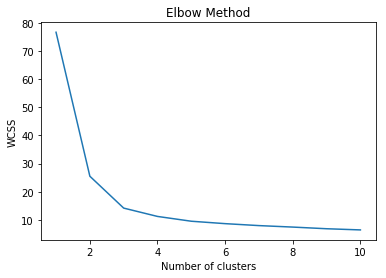

In [193]:
###***************************************************************###
### Import K Means
### Let us verify how many clusters required
######************************************************************###

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,max_iter=300,n_init=10,random_state=0)
    km.fit(clust1)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [194]:
## As per the above elbow graph, we can choose cluster to be of size 4
km = KMeans(n_clusters=4)
km.fit(clust1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [195]:
predict = km.predict(clust1)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 3, 1, 1,
       1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 2, 2, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 2, 1, 1,
       1, 1, 1, 2, 1, 0, 0, 3, 1, 1, 1, 0, 1, 2, 0, 2, 2, 2, 2, 3, 1, 3,
       1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 2, 2,
       2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 3, 1, 2, 1, 1, 1, 1, 2, 3,
       2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 3, 1, 3,
       3, 2, 2, 2, 2, 3, 3, 1, 1, 1, 0, 1, 2, 2, 0, 0, 0, 0, 3, 3, 3, 1,
       3, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 3, 1, 1, 1, 3, 3, 3, 3, 2,
       1, 1, 3, 3, 3, 3, 3, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 0, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 2, 3, 3, 2, 2, 1, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 3, 3, 3, 1, 2, 0, 1, 2,

# Q9. Check for no of values in each cluster and centers for each variables. 

In [196]:
## Check the clusters and Centers for each Variable


In [197]:
km.cluster_centers_

array([[1.        , 0.76757675, 0.70170327, 0.80713226, 0.51139009,
        0.31295075],
       [0.49673913, 0.26653607, 0.38529301, 0.49140078, 0.65445302,
        0.53802948],
       [0.76510989, 0.48704263, 0.44223602, 0.62764998, 0.66040411,
        0.43173136],
       [0.50131579, 0.20807403, 0.29629291, 0.40091133, 0.68293718,
        0.72963632]])

# Q10. Assign the groups created above to data frame and study the characteristics  for each group.

In [198]:
dfclust = pd.DataFrame(data=km.cluster_centers_, columns=required_cols)
dfclust



,cylinders,displacement,horsepower,weight,acceleration,mpg
0,1.000000,0.767577,0.701703,0.807132,0.511390,0.312951
1,0.496739,0.266536,0.385293,0.491401,0.654453,0.538029
2,0.765110,0.487043,0.442236,0.627650,0.660404,0.431731
3,0.501316,0.208074,0.296293,0.400911,0.682937,0.729636


In [199]:
df['KM Labels'] = km.labels_
df.head(100)

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname,KM Labels
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,0
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500,0
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala,0
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii,0
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina,0
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl,0


In [ ]:
# Export the data into csv for any further analysis

from pandas import ExcelWriter
writer = ExcelWriter('d:\groups.xls')
cars_df.to_excel(writer,'Sheet1')
writer.save()

In [ ]:
# We can try similar analysis for 3 grps as well to check if we get more clear distinction among groups